<a href="https://colab.research.google.com/github/m-wambua/image-classification/blob/master/vgg16_using_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#===================================
''' Imports'''
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import (
    Dense,
    Dropout,
    Activation,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization
)
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K 
from keras import regularizers
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
#===========================================


In [2]:
#======================================
'''Set your parameters'''
number_classes=10
wght_decay=0.00005
x_shape=[32,32,3]
batch_size=64
max_epochs=30
learning_rate=0.1
learning_decay=1e-6
learniing_drop=20
#=================================

170498071/170498071 [==============================] - 3s 0us/step


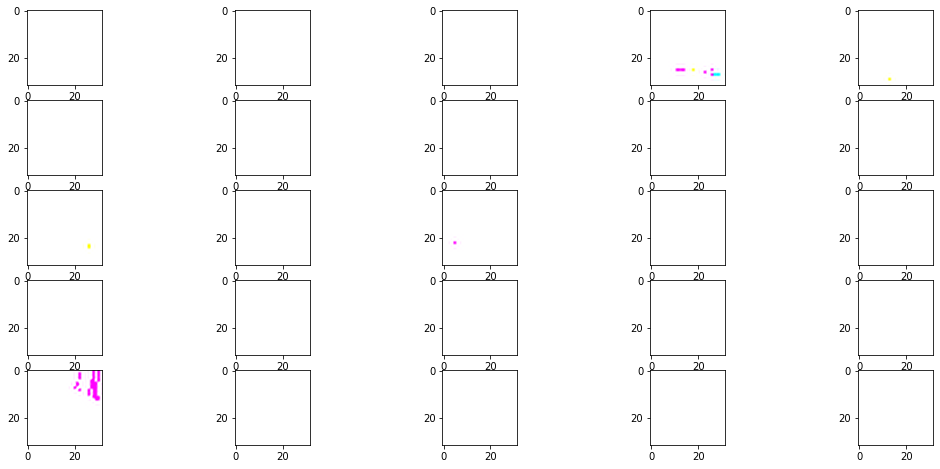

In [3]:
#================================
# LOading the dataset and generating a few images
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

fig=plt.figure(figsize=(18,8))
columns=5
rows=5

for i in range(1,columns*rows +1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(x_train[i],
               interpolation='lanczos')
    
#===========================================

In [4]:
#=====================================
# Standardize the image data
import tensorflow
mean=np.mean(x_train,axis=(0,1,2,3))
std=np.std(x_train,axis=(0,1,2,3))
x_train=(x_train-mean)/(std+1e-7)
x_test=(x_test-mean)/(std+1e-7)
y_train=tensorflow.keras.utils.to_categorical(y_train,number_classes)
y_test=tensorflow.keras.utils.to_categorical(y_test,number_classes)
#===============================================

In [5]:
#=====================================
# The VGG16 model
model=Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=x_shape,kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(number_classes))
model.add(Activation('softmax'))
#====================================


In [6]:
#===========================
# Generating the model summary
model.summary()
#===========================

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                        

In [7]:
#=================================
# Image Augmentation
image_augm=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=12,
    width_shift_range=0.2,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

image_augm.fit(x_train)

sgd=keras.optimizers.SGD(lr=learning_rate,decay=learning_decay,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
filepath="weights.best.hdf5"
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]
trained_model=model.fit_generator(image_augm.flow(x_train,y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0]//batch_size,
                                  epochs=max_epochs,validation_data=(x_test,y_test),
                                  callbacks=callbacks_list,verbose=1)
#================================

Epoch 1/30
781/781 [==============================] - ETA: 0s - loss: 6.0336 - accuracy: 0.2163
Epoch 1: val_accuracy improved from -inf to 0.19500, saving model to weights.best.hdf5
781/781 [==============================] - 72s 78ms/step - loss: 6.0336 - accuracy: 0.2163 - val_loss: 5.8274 - val_accuracy: 0.1950
Epoch 2/30
781/781 [==============================] - ETA: 0s - loss: 4.9631 - accuracy: 0.3040
Epoch 2: val_accuracy improved from 0.19500 to 0.19690, saving model to weights.best.hdf5
781/781 [==============================] - 59s 75ms/step - loss: 4.9631 - accuracy: 0.3040 - val_loss: 5.3815 - val_accuracy: 0.1969
Epoch 3/30
781/781 [==============================] - ETA: 0s - loss: 4.4073 - accuracy: 0.3544
Epoch 3: val_accuracy improved from 0.19690 to 0.26550, saving model to weights.best.hdf5
781/781 [==============================] - 59s 75ms/step - loss: 4.4073 - accuracy: 0.3544 - val_loss: 4.6753 - val_accuracy: 0.2655
Epoch 4/30
781/781 [==========================

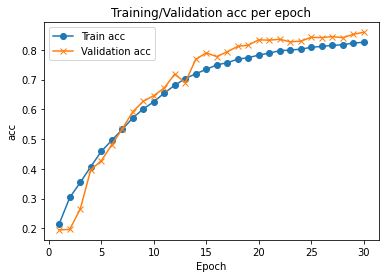

In [9]:
#=====================================
# plottiing the accuracy
import matplotlib.pyplot as plt
f,ax=plt.subplots()
ax.plot([None]+model.history.history['accuracy'],'o-')
ax.plot([None]+model.history.history['val_accuracy'],'x-')
ax.legend(['Train acc','Validation acc'],loc=0)
ax.set_title('Training/Validation acc per epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.savefig('training-and-validation-accuracy-per-epoch.jpg')
#==================================

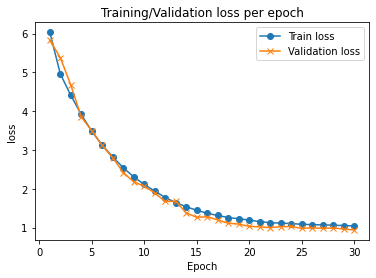

In [10]:
f,ax=plt.subplots()
ax.plot([None]+model.history.history['loss'],'o-')
ax.plot([None]+model.history.history['val_loss'],'x-')
ax.legend(['Train loss','Validation loss'],loc=0)
ax.set_title('Training/Validation loss per epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
plt.savefig('training-and-validation-loss-per-epoch.jpg')
#==================================


In [12]:
predictions=model.predict(x_test)
from sklearn.metrics import confusion_matrix
import numpy as np
rounded_labels=np.argmax(y_test,axis=1)
rounded_labels[1]

cm=confusion_matrix(rounded_labels,np.argmax(predictions,axis=1))

313/313 [==============================] - 3s 10ms/step


In [13]:
cm

array([[889,   7,  50,   4,   3,   0,   5,   7,  20,  15],
       [  8, 969,   1,   0,   0,   0,   1,   0,   4,  17],
       [ 25,   0, 867,  14,  27,  23,  27,  15,   2,   0],
       [ 21,   3,  77, 691,  32,  74,  55,  37,   4,   6],
       [ 15,   1,  62,   8, 841,   7,  36,  25,   4,   1],
       [  8,   1,  31, 144,  31, 727,  17,  38,   3,   0],
       [  6,   1,  33,  18,   7,   5, 922,   5,   2,   1],
       [ 11,   0,  18,  16,  27,  15,   1, 911,   1,   0],
       [ 63,  17,  13,   3,   1,   1,   1,   4, 888,   9],
       [ 20,  71,   1,   3,   2,   1,   4,   8,   6, 884]])

In [16]:
def plot_confusion_matrix(cm):
  cm=[row/sum(row) for row in cm]
  fig=plt.figure(figsize=(10,10))
  ax=fig.add_subplot(111)
  cax=ax.matshow(cm,cmap=plt.cm.Oranges)
  fig.colorbar(cax)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Class IDs')
  plt.ylabel('True Class IDs')
  plt.show()
  plt.savefig('confusion-matrix.jpg')
  

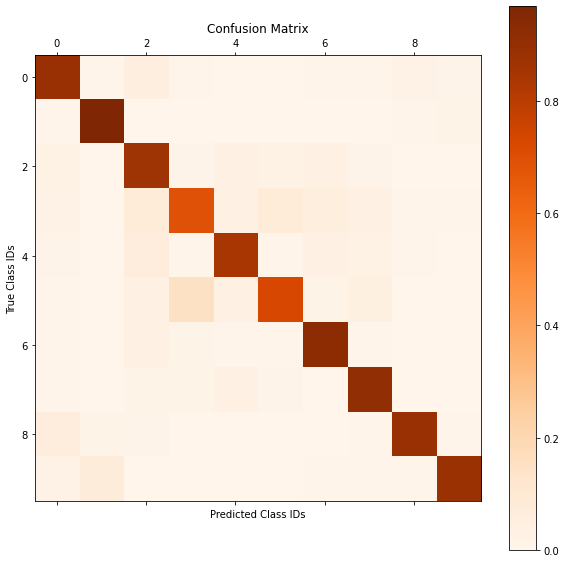

<Figure size 432x288 with 0 Axes>

In [17]:
plot_confusion_matrix(cm)